# Lokta voltera

Two types species: **prey** (A) and **predator** (B).

Three reactions:
#### Prey birth: 

$$\emptyset \rightarrow A$$

$$v_b= V_m\frac{A/A_0}{1 + A/A_0}$$
    
- $V_m$: Maximum birth rate
- $A_0$: Population saturation
    
#### Prey consumption by predators+reproduction: 
$$A+B\rightarrow  2 B$$

$$v_{cr}= \alpha B\times A $$
#### predator death $B \rightarrow \emptyset$

$$v_{d}= k B $$

### parameters:

- $A_0$ = 1000

## Exercise

1. Write a Deterministic ODE function that matches either `odeint` or `ode` conventions:
```python
## odeint 
def derivative(pop_list,time,p1,p2,...):
    return pop_deriv_list
## ode
def derivative(time,pop_list,p1,p2,...):
    return pop_deriv_list
```
2. Wrap a deterministic integrator under a `run_deterministic` function.

3. Write a Gillespie algorithm for the same system wrapped under the function `run_stochastic.`

4. Run the two simulations with the following conditions:
    - `pop0 = [10,10]`
    - `tmax = 100`
5. Plot the time series for the two simulations on the same plot. What is the major difference between the two types of simulation?

6. Try new initial conditions with smaller population sizes


In [2]:
# Import required libraries
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import random
from math import log

Write a Deterministic ODE function that matches either `odeint` or `ode` conventions:
```python
## odeint 
def derivative(pop_list,time,p1,p2,...):
    return pop_deriv_list
## ode
def derivative(time,pop_list,p1,p2,...):
    return pop_deriv_list
```
Wrap a deterministic integrator under a `run_deterministic` function.

In [3]:
def derivative(pop,t,param):
    A0=param["A0"];Vm=param["Vm"];alpha=param["alpha"];k=param["k"]
    A = pop[0]
    B = pop[1]
    a = A/A0
    vb = Vm*a/(1+a)
    vcr = alpha*B*A
    vd = k*B
    dA = vb-vcr
    dB = vcr-vd
    return [dA,dB]

## Args of odeint must be a tuple. Note the syntax for a size 1 tuple: (param,)
def run_deterministic(pop0,times,param):
    res = odeint(derivative,y0=pop0,t=times,args=(param,))
    return times,res

Write a Gillespie algorithm for the same system wrapped under the function `run_stochastic.`

In [4]:
def compute_rates(pop,param):
    A0=param["A0"];Vm=param["Vm"];alpha=param["alpha"];k=param["k"]
    A = pop[0]
    B = pop[1]
    a = A/A0
    vb = Vm*a/(1+a)
    vcr = alpha*B*A
    vd = k*B
    return vb,vcr,vd


def run_gillespie(pop0,tmax,param):
    times = [0]
    dt=0
    res = [np.array(pop0)] # population vectors are np arrays stored in a list
    stoichiometry = np.array([[1,0],[-1,1],[0,-1]])
    while times[-1]<tmax:
        pop = res[-1]
        rates = compute_rates(pop,param)
    
        a0 = sum(rates)
        
        r1 = random.random()
        dt = 1/a0*log(1/r1)
        r2 = random.random()
        reac_index = 0
        threshold=0
        for i in range(len(rates)):
            threshold=threshold+(rates[i]/a0)
            reac_index = i
            if r2<threshold:
                break
        #if times[-1]>10:
        #    import pdb;pdb.set_trace()
        pop = pop + stoichiometry[reac_index] # length 2 np array can be added like this. It wouldn't be possible with lists 
        pop[pop<0] = 0 # Negative 
        res.append(pop)
        times.append(times[-1]+dt)
    return times,np.array(res)

Run the two simulations with the following conditions:
- `pop0 = [10,10]`
- `tmax = 100`

In [13]:
times = np.linspace(0,200,200)
pop0 = [10,10]
param=dict(
    A0=1000,
    Vm=500,
    alpha=0.001,
    k=0.5
)
times_d,res_d = run_deterministic(pop0,times,param)
times_s,res_s = run_gillespie(pop0,times[-1],param)

Plot the time series for the two simulations on the same plot. What is the major difference between the two types of simulation?

<IPython.core.display.Javascript object>


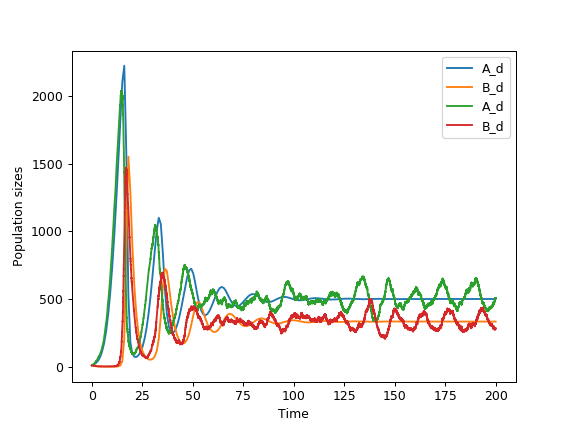

In [14]:
fig,ax = plt.subplots()
ax.plot(times_d,res_d[:,0],label="A_d")
ax.plot(times_d,res_d[:,1],label="B_d")
ax.plot(times_s,res_s[:,0],label="A_d")
ax.plot(times_s,res_s[:,1],label="B_d")
ax.set_xlabel("Time")
ax.set_ylabel("Population sizes")
ax.legend()

The noise kicks the system out of the steady state and sustains an oscillating system